# STA130 HW 6

Rasyid Rafi Pamuji

Student Number: 1011270081

## 1. Theoretical Simple Linear Regression Model and Python Code

Based on my conversation with ChatGPT, I have concluded that a Simple Linear Regression model can be expressed in this mathematical equation:

Y = β0 + β1X + ε

where:

Y = Outcome variable. This is what we are trying to predict.

X = Predictor variable. This is what we use to make predictions.

β0 = Intercept. Starting point for the prediction. Value of Y when X = 0.

β1 = Slope. Tells us how much Y changes for each unit increase in X.

ε = Error term. Accounts for randomness and things we can't explain.

When we combine all these parts, we can use the equation to make predictions about Y. But the actual value of Y might not perfectly match the prediction because of random factors we didn’t include in the model (that’s the error term, ε).

The relationship to the Normal Distribution:

In SLR, we assume that this error term ε is random and follows a normal distribution:

ε∼N(0,σ^2)

which means the errors are normally distributed, with a mean of 0 and some constant variance σ^2. The mean of 0 means that, on average, the error will cancel out (sometimes we overpredict, sometimes we underpredict, but it averages out to 0).

The model aims to predict Y based on X, where the relationship is linear. The intercept and slope coefficients determine the position and angle of the line, while the error term reflects how individual observations deviate from this line due to random factors.

Because of this assumption, the outcome Y itself follows a normal distribution for each value of X. So for any given value of X, the predicted Y will be normally distributed around the line formed by β0 + β1X.

Equation: Y ∣ X∼N(β0 + β1X,σ^2)

In other words, for any given value of X, the actual values of Y are "spread out" around the line predicted by β0 + β1X, following a normal distribution.

Python Code:

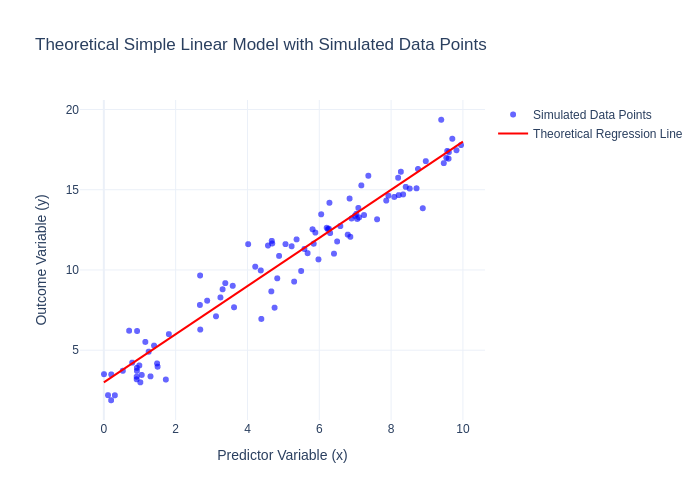

In [2]:
import numpy as np
import plotly.graph_objects as go
from scipy.stats import uniform, norm

# Parameters for the theoretical Simple Linear Model
n = 100              # Number of observations
beta_0 = 3           # Intercept
beta_1 = 1.5         # Slope
sigma = 1.2          # Standard deviation of the error term

# Generate predictor variable (x) from a uniform distribution
x = uniform.rvs(0, 10, size=n)

# Generate random errors from a normal distribution with mean 0 and standard deviation sigma
errors = norm.rvs(0, sigma, size=n)

# Calculate outcome variable (y) using the theoretical model equation
y = beta_0 + beta_1 * x + errors

# Create plotly figure to visualize the theoretical regression line and simulated data points
fig = go.Figure()

# Add scatter plot of generated (x, y) data points
fig.add_trace(go.Scatter(x=x, y=y, mode='markers', name='Simulated Data Points', marker=dict(color='blue', opacity=0.6)))

# Add theoretical regression line (y = beta_0 + beta_1 * x without errors)
x_line = np.linspace(0, 10, 100)
y_line = beta_0 + beta_1 * x_line
fig.add_trace(go.Scatter(x=x_line, y=y_line, mode='lines', name='Theoretical Regression Line', line=dict(color='red')))

# Format plot
fig.update_layout(title="Theoretical Simple Linear Model with Simulated Data Points",
                  xaxis_title="Predictor Variable (x)",
                  yaxis_title="Outcome Variable (y)",
                  template="plotly_white")

fig.show(renderer='png')


Mathematical and Statistical Breakdown

1. Predictors (x): We generate x from a uniform distribution to simulate possible values for our independent variable. Here, x values range approximately between 0 and 10.

2. Errors (ε): We create error terms using a normal distribution, centered around zero with a standard deviation of σ, representing the noise or random variability in the model.

3. Outcome Variable (y): Using the equation: y = β0 + β1x + ε, we combine the intercept β0, slope β1, and errors to generate values for y.

Interpretation

The result shows a linear relationship where the outcome y is distributed around the regression line y = β0 + β1x. The scatter around the line is due to the error term, simulating realistic variation around the theoretical relationship defined by β0 and β1.

## 2. Simulated Dataset on Creating and Visualizing a fitted Simple Linear Regression model

This is the code created by ChatGPT for the Simulated Dataset:

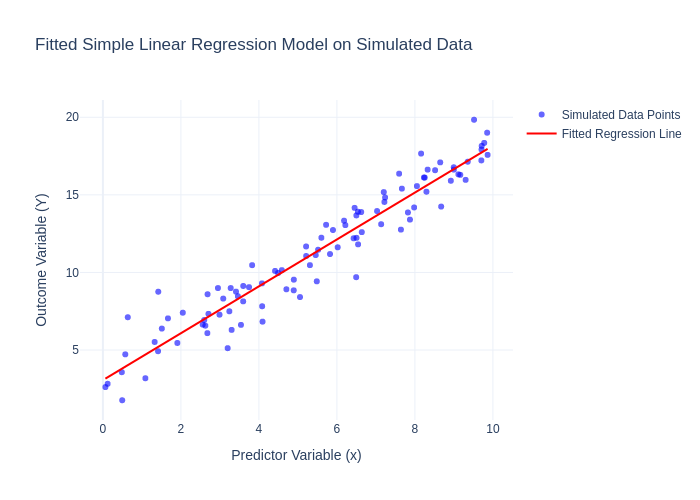

In [3]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
from scipy.stats import uniform, norm
import statsmodels.formula.api as smf

# Step 1: Simulate data using the theoretical Simple Linear Model
n = 100              # Number of observations
beta_0 = 3           # Intercept
beta_1 = 1.5         # Slope
sigma = 1.2          # Standard deviation of the error term

# Generate predictor variable (x) and random errors (epsilon)
x = uniform.rvs(0, 10, size=n)
errors = norm.rvs(0, sigma, size=n)

# Calculate outcome variable (Y)
y = beta_0 + beta_1 * x + errors

# Step 2: Create a pandas DataFrame with the simulated data
df = pd.DataFrame({'x': x, 'Y': y})

# Step 3: Fit a Simple Linear Regression model using statsmodels
model = smf.ols('Y ~ x', data=df).fit()

# Step 4: Visualize the data and fitted regression line using Plotly
# Scatter plot of simulated data points
fig = go.Figure()
fig.add_trace(go.Scatter(x=df['x'], y=df['Y'], mode='markers', name='Simulated Data Points', marker=dict(color='blue', opacity=0.6)))

# Plot the fitted regression line
x_line = np.linspace(df['x'].min(), df['x'].max(), 100)
y_line = model.params['Intercept'] + model.params['x'] * x_line
fig.add_trace(go.Scatter(x=x_line, y=y_line, mode='lines', name='Fitted Regression Line', line=dict(color='red')))

# Format the plot
fig.update_layout(title="Fitted Simple Linear Regression Model on Simulated Data",
                  xaxis_title="Predictor Variable (x)",
                  yaxis_title="Outcome Variable (Y)",
                  template="plotly_white")

fig.show(renderer='png')


Explanation of each step:

1. Simulate Data:

    Using the theoretical model Y = β0 + β1x + ε, we generate x values from a uniform distribution and errors from a normal distribution with standard deviation σ, then calculate Y.

2. DataFrame Creation:
    
    We store x and Y in a pandas DataFrame called df.

3. Model Fitting:

    We fit a Simple Linear Regression model using statsmodels.formula.api (smf.ols), specifying the formula 'Y ~ x'.

5. Visualization:

    We plot the simulated data points (x, Y).
    
    We add a fitted regression line calculated from the model parameters, Intercept and x coefficient, from model.params.

This example demonstrates how to simulate a dataset based on a theoretical Simple Linear Regression model, fit the model using statsmodels, and visualize the results. The fitted model provides insights into the relationship between the predictor and outcome variables while showcasing how the model specification is applied in practice.

and Inline Comments replaced:

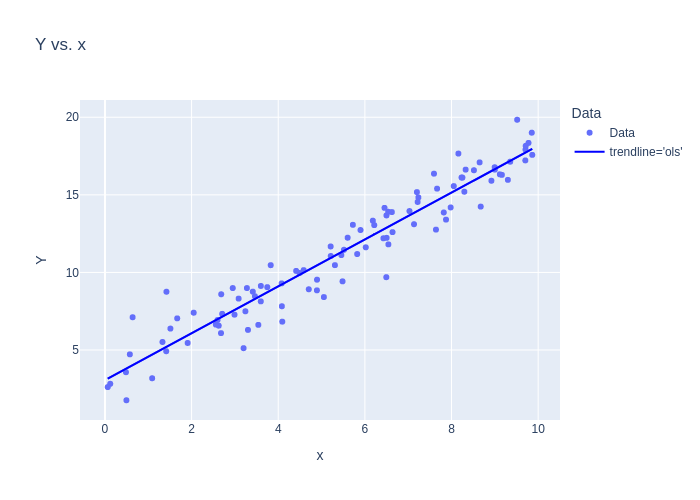

In [4]:
import statsmodels.formula.api as smf  # What is this library for?
# Answer: `statsmodels.formula.api` provides tools to specify and fit statistical models
# using formulas (like "Y ~ x"). The "ols" function specifically is for creating
# Ordinary Least Squares (OLS) regression models.

import plotly.express as px  # This is a plotting library
# Answer: Plotly Express is a high-level library that makes it quick to create
# interactive visualizations in Python, such as scatter plots, line charts, and more.

# What are the following two steps doing?
model_data_specification = smf.ols("Y~x", data=df) 
fitted_model = model_data_specification.fit() 

# Answer: The first step specifies a Simple Linear Regression model with "Y" as the outcome variable
# and "x" as the predictor, but it doesn’t fit the model yet.
# The second step fits the model to the data, estimating the intercept and slope coefficients.

# What do each of the following provide?
fitted_model.summary()  # Simple explanation?
# Answer: `fitted_model.summary()` generates a detailed summary of the regression model,
# including coefficient estimates, standard errors, R-squared, and more.

fitted_model.summary().tables[1]  # Simple explanation?
# Answer: `fitted_model.summary().tables[1]` provides a table specifically showing 
# regression coefficients, their standard errors, t-values, and p-values.

fitted_model.params  # Simple explanation?
# Answer: `fitted_model.params` returns a pandas Series with the estimated coefficients
# for the intercept and predictor variable(s).

fitted_model.params.values  # Simple explanation?
# Answer: `fitted_model.params.values` returns the values of the estimated coefficients
# as a NumPy array.

fitted_model.rsquared  # Simple explanation?
# Answer: `fitted_model.rsquared` provides the R-squared value, a measure of how well
# the model explains the variance in the outcome variable "Y".

# What two things does this add onto the figure?
df['Data'] = 'Data'  # hack to add data to legend 
fig = px.scatter(df, x='x', y='Y', color='Data', 
                 trendline='ols', title='Y vs. x')

# Answer: This code adds both the scatter plot of "x" and "Y" with the specified color,
# and the OLS regression line (trendline) fitted to the data.

# This is essentially what above `trendline='ols'` does
fig.add_scatter(x=df['x'], y=fitted_model.fittedvalues,
                line=dict(color='blue'), name="trendline='ols'")

fig.show(renderer='png')  # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS


## 3. Adding Question 1 Line to Question 2 and the Difference Between the nature of the Two Lines

Code that visualizes the Question 1 Line on the Question 2 Figure:

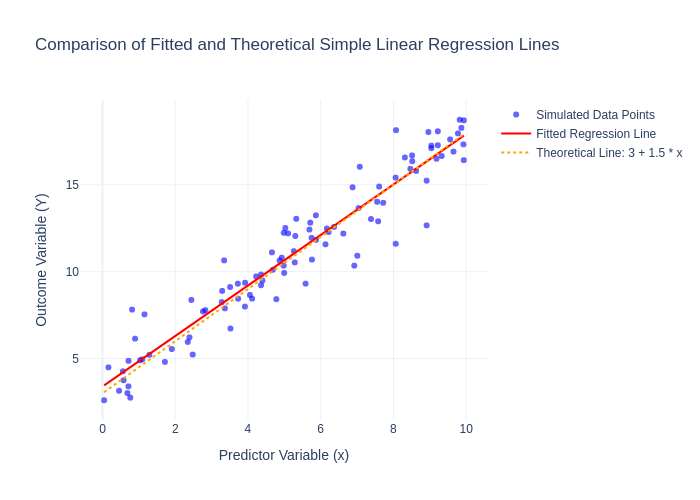

In [5]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
from scipy.stats import uniform, norm
import statsmodels.formula.api as smf

# Step 1: Simulate data using the theoretical Simple Linear Model
n = 100              # Number of observations
beta_0 = 3           # Intercept
beta_1 = 1.5         # Slope
sigma = 1.2          # Standard deviation of the error term

# Generate predictor variable (x) and random errors (epsilon)
x = uniform.rvs(0, 10, size=n)
errors = norm.rvs(0, sigma, size=n)

# Calculate outcome variable (Y)
y = beta_0 + beta_1 * x + errors

# Step 2: Create a pandas DataFrame with the simulated data
df = pd.DataFrame({'x': x, 'Y': y})

# Step 3: Fit a Simple Linear Regression model using statsmodels
model = smf.ols('Y ~ x', data=df).fit()

# Step 4: Visualize the data and fitted regression line using Plotly
# Scatter plot of simulated data points
fig = go.Figure()
fig.add_trace(go.Scatter(x=df['x'], y=df['Y'], mode='markers', name='Simulated Data Points', marker=dict(color='blue', opacity=0.6)))

# Plot the fitted regression line
x_line = np.linspace(df['x'].min(), df['x'].max(), 100)
y_line = model.params['Intercept'] + model.params['x'] * x_line
fig.add_trace(go.Scatter(x=x_line, y=y_line, mode='lines', name='Fitted Regression Line', line=dict(color='red')))

# Add the theoretical regression line from Question 1
x_range = np.array([df['x'].min(), df['x'].max()])
y_theoretical_line = beta_0 + beta_1 * x_range
fig.add_scatter(x=x_range, y=y_theoretical_line, mode='lines',
                 name=f'Theoretical Line: {beta_0} + {beta_1} * x', 
                 line=dict(dash='dot', color='orange'))

# Format the plot
fig.update_layout(title="Comparison of Fitted and Theoretical Simple Linear Regression Lines",
                  xaxis_title="Predictor Variable (x)",
                  yaxis_title="Outcome Variable (Y)",
                  template="plotly_white")

fig.show(renderer='png')

In my own words, the difference between the nature of the two lines are:

1. The **theoretical line** is based on the exact known parameters and shows the "true" relationship without any noise. It serves as a benchmark or reference and represents the "ideal" model. The line is a "perfect" relationship without considering any noise or variability in the data. It is the model of the underlying distribution. It is derived from the equation: Y = β0 + β1x.

    The theoretical line represents a constant relationship that was assumed before generating the data. It doesn't change with different simulations as it is derived directly from the chosen parameters.

2. The **fitted line** is based on the observed, noisy data and reflects the model's estimation of the relationship, which may deviate slightly due to the presence of random errors. It serves as an estimator for the theoretical line. It represents the best approximation of the relationship based on the noisy data. It reflects the model's attempt to find the best-fit parameters for the given data, which may differ from the true parameters. It reflects the estimated relationship between x and Y after fitting the Simple Linear Regression model using statsmodels. The fitted line may differ from the theoretical line due to the random errors introduced during data simulation.

    The fitted line varies with each simulation, capturing the actual data's variation, including random noise. This line provides an estimate of the relationship that best describes the observed data points, which can shift and adapt depending on the generated errors in each simulation. The closer the fitted line is to the theoretical line, the more accurate the model is.

## 4. Explanation of how fitted_model.fittedvalues are derived on the basis of fitted_model.summary().tables[1]

When you fit a model using statsmodels, you obtain an object (e.g., fitted_model) that contains the estimated coefficients. You can access these coefficients using fitted_model.params, which returns a pandas Series.

fitted_model.params: This attribute contains the estimated coefficients, where:

- fitted_model.params['Intercept'] is β hat 0.
- fitted_model.params['x'] is β hat 1.

For instance, if the output from fitted_model.summary().tables[1] shows:

Coefficient	Value
Intercept	3.00
x	1.50
Then, we have:

β
hat
​0
​
 =3.00

β
hat
​1
​
 =1.50
 
The fitted_model.params (or fitted_model.params.values) represent the estimated coefficients for the intercept and slope in the regression model. These parameters are derived from fitting the Simple Linear Regression model to the data using the method of ordinary least squares (OLS).

For a simple linear regression model Y = β0 + β1 x, the fitted_model.params contains:

- beta_0: The intercept
- beta_1: The slope

The fitted values, fitted_model.fittedvalues, are the predicted values of y for each x in the dataset, based on the estimated regression equation: Y hat i = β hat 0 + β hat 1 xi.

Y hat i is the fitted value for each xi.

β hat 0 is the estimated intercept (from fitted_model.params['Intercept']).

β hat 1 is the estimated slope (from fitted_model.params['x']).

xi is the value of the predictor variable for each data point in the dataset.

For each observation xi in the data, the corresponding fitted value Y hat i is calculated by plugging xi into the regression equation.

In code terms:

fitted_values = fitted_model.params['Intercept'] + fitted_model.params['x'] * df['x']

This produces the same result as fitted_model.fittedvalues, which are the predicted y values based on the model.

Linking fitted_model.summary().tables[1]:

fitted_model.summary().tables[1] displays the estimated parameters and their statistics, including the intercept and slope (under columns labeled "coef"). The coef values in this table are the same as those in fitted_model.params, and they directly determine the fitted values.

In-Sample Predictions vs. Theoretical Model

- In-Sample Predictions: The fitted values (y hat ​i​
 ) represent predictions made using the estimated coefficients from the actual data. They reflect the relationship as determined by the model after accounting for the random noise in the data.

- Theoretical Model: The theoretical model uses the true parameters that generated the data.

The fitted values obtained from a Simple Linear Regression model represent the best estimates of the outcome variable based on the estimated coefficients derived from the data. These estimates differ from the theoretical model, which is based on the idealized parameters used to generate the data initially.

In practice, the fitted model captures the average effect of the predictor variable while acknowledging the inherent randomness present in the observed data. This distinction is crucial for understanding how regression models are applied in real-world scenarios, where data often includes variability not accounted for in theoretical models.

In summary, fitted_model.params provides the estimated coefficients for the intercept and slope. fitted_model.fittedvalues are computed by plugging the xi values from the dataset into the regression equation Y hat i = β hat 0 + β hat 1 xi where β hat 0 and β hat 1 are the estimated coefficients from fitted_model.params. fitted_model.summary().tables[1] contains the same coefficients (under "coef") that are used in this process.

## 5. Line chosen and why it requires "squares"

The line chosen for the fitted model, using the ordinary least squares (OLS) method, is the one that minimizes the sum of the squared residuals. OLS requires squares for these residuals to avoid canceling positive and negative deviations, since squaring each residual makes all values positive, so that both positive and negative deviations contribute equally to the measure of fit quality. It also needs to penalize larger deviations more heavily because squaring residuals emphasizes larger deviations, making the OLS method sensitive to significant errors and thus leading to a line that balances all points closely. And squaring residuals creates a smooth, differentiable function with a single global minimum, making it possible to calculate the best-fit line analytically and efficiently.

## 6. Expressions Explanations

1. 1-((Y-fitted_model.fittedvalues)**2).sum()/((Y-Y.mean())**2).sum() can be expressed as:

1 − (∑(Y−Y hat)^2 / ∑(Y−Y bar)^2).

- ∑(Y−Y bar)^2 is the total sum of squares (TSS), representing the total variation of Y around its mean.

- ∑(Y−Y hat)^2 is the residual sum of squares (RSS), representing the unexplained variation in Y after fitting the model.

By taking 1 - (RSS / TSS), this expression calculates the proportion of the total variation that is explained by the model, also known as the coefficient of determination R^2.

2. fitted_model.rsquared is a direct calculation of the R^2 value and provides the same measure as the previous expression: the proportion of variation in Y explained by the model. A higher R^2 value (closer to 1) indicates that the model’s predictions closely match the observed data, which is often interpreted as greater accuracy of the model in representing the observed variation in Y.

3. np.corrcoef(Y, fitted_model.fittedvalues)[0,1]**2 calculates the squared correlation between the observed values Y and the predicted values Y hat. Squaring the correlation coefficient gives the proportion of shared variation between Y and Y hat, which is the same as the R^2 value in the context of a Simple Linear Regression. Thus, it also represents the accuracy of the model in explaining Y.

4. np.corrcoef(Y, x)[0,1]**2 calculates the squared correlation between Y and x, representing how much of Y’s variation is linearly related to the predictor x. In Simple Linear Regression, this squared correlation is equal to the model’s R^2 since the model uses only x to predict Y. Thus, it also represents the proportion of Y explained by x in a direct, linear relationship.

## 7. Assumptions of the Simple Linear Regression model specification and example data

Displaying the code:

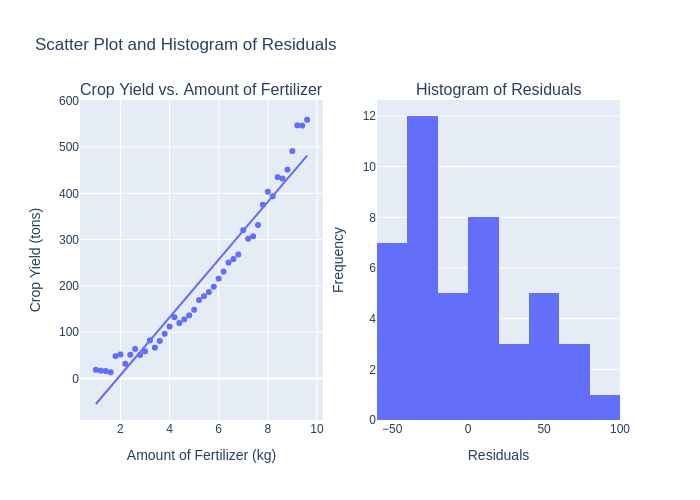

In [6]:
import pandas as pd
from scipy import stats
import plotly.express as px
from plotly.subplots import make_subplots

# This data shows the relationship between the amount of fertilizer used and crop yield
data = {'Amount of Fertilizer (kg) (x)': [1, 1.2, 1.4, 1.6, 1.8, 2, 2.2, 2.4, 2.6, 
                                          2.8, 3, 3.2, 3.4, 3.6, 3.8, 4, 4.2, 4.4, 
                                          4.6, 4.8, 5, 5.2, 5.4, 5.6, 5.8, 6, 6.2, 
                                          6.4, 6.6, 6.8, 7, 7.2, 7.4, 7.6, 7.8, 8, 
                                          8.2, 8.4, 8.6, 8.8,9, 9.2, 9.4, 9.6],
        'Crop Yield (tons) (Y)': [18.7, 16.9, 16.1, 13.4, 48.4, 51.9, 31.8, 51.3, 
                                  63.9, 50.6, 58.7, 82.4, 66.7, 81.2, 96.5, 112.2, 
                                  132.5, 119.8, 127.7, 136.3, 148.5, 169.4, 177.9, 
                                  186.7, 198.1, 215.7, 230.7, 250.4, 258. , 267.8, 
                                  320.4, 302. , 307.2, 331.5, 375.3, 403.4, 393.5,
                                  434.9, 431.9, 451.1, 491.2, 546.8, 546.4, 558.9]}
df = pd.DataFrame(data)
fig1 = px.scatter(df, x='Amount of Fertilizer (kg) (x)', y='Crop Yield (tons) (Y)',
                  trendline='ols', title='Crop Yield vs. Amount of Fertilizer')

# Perform linear regression using scipy.stats
slope, intercept, r_value, p_value, std_err = \
    stats.linregress(df['Amount of Fertilizer (kg) (x)'], df['Crop Yield (tons) (Y)'])
# Predict the values and calculate residuals
y_hat = intercept + slope * df['Amount of Fertilizer (kg) (x)']
residuals = df['Crop Yield (tons) (Y)'] - y_hat
df['Residuals'] = residuals
fig2 = px.histogram(df, x='Residuals', nbins=10, title='Histogram of Residuals',
                    labels={'Residuals': 'Residuals'})

fig = make_subplots(rows=1, cols=2,
                    subplot_titles=('Crop Yield vs. Amount of Fertilizer', 
                                    'Histogram of Residuals'))
for trace in fig1.data:
    fig.add_trace(trace, row=1, col=1)
for trace in fig2.data:
    fig.add_trace(trace, row=1, col=2)
fig.update_layout(title='Scatter Plot and Histogram of Residuals',
    xaxis_title='Amount of Fertilizer (kg)', yaxis_title='Crop Yield (tons)',
    xaxis2_title='Residuals', yaxis2_title='Frequency', showlegend=False)

fig.show(renderer='png') # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

Looking at the data and visualizations in this example, we can identify two key assumptions that seem inconsistent with the Simple Linear Regression model.

- Observing the scatter plot of Crop Yield vs. Amount of Fertilizer, we can see a nonlinear trend—crop yield increases at a rate that accelerates as the amount of fertilizer increases. This shape suggests a potential exponential or quadratic relationship rather than a straight line. The linear model would not be able to capture this pattern effectively, resulting in a poor fit and high residuals in some regions.

- The histogram of residuals does not appear to be normally distributed, which is also a sign of the model’s failure to accurately capture the data’s trend. Nonlinear relationships can lead to skewed or patterned residuals, as seen here, where larger residuals (deviations) likely occur when the fitted model underestimates or overestimates parts of the observed nonlinear trend.

The nonlinear relationship and the non-normal residuals suggest that the assumptions of Simple Linear Regression are not met. This indicates that a different model, such as a polynomial or exponential regression, may be more suitable to explain the relationship between fertilizer amount and crop yield.

## Summary of Chatbot Session for No. 1-7:

Certainly! Here’s a summary of what we’ve covered in our discussion about Simple Linear Regression:

1. **Theoretical Model Specification**:  
   - Simple Linear Regression models the relationship between a predictor \( x \) and an outcome \( y \) as:
     \[
     y = \beta_0 + \beta_1 x + \epsilon
     \]
   - Here, \( \beta_0 \) (intercept) and \( \beta_1 \) (slope) are fixed coefficients, and \( \epsilon \) is a normally distributed error term with mean zero and some standard deviation \( \sigma \). This error term introduces variability around the regression line.

2. **Simulating Data from a Theoretical Model**:
   - We created simulated data by specifying values for \( \beta_0 \), \( \beta_1 \), \( \sigma \), and \( x \) (drawn from a uniform distribution), then calculated \( y \) based on these parameters and added random errors.
   - The visualization of this theoretical model featured two lines: one showing the idealized model (without error) and another representing the simulated data points around this line.

3. **Fitting a Simple Linear Regression Model**:
   - Using observed data, we used the "ordinary least squares" (OLS) method to estimate the values of \( \hat{\beta_0} \) and \( \hat{\beta_1} \) that best fit the data by minimizing the sum of squared residuals.
   - Squaring residuals emphasizes larger errors and penalizes them more, ensuring that both negative and positive residuals contribute equally to the total error.

4. **Residuals and Model Fit**:
   - Residuals represent the difference between observed values and predicted values from the fitted model.
   - Plotting residuals (or adding vertical lines in a visualization) helps assess the fit of the model. Patterns in residuals often suggest model inadequacies, such as nonlinearity.

5. **Assessing Model Accuracy with \( R^2 \)**:
   - \( R^2 \) (the coefficient of determination) quantifies the proportion of variance in \( y \) that is explained by the predictor \( x \).
   - Computed as \( 1 - \frac{\text{SSR}}{\text{SST}} \), where SSR is the sum of squared residuals and SST is the total sum of squares, \( R^2 \) indicates model fit, with values closer to 1 suggesting a better fit.
   - We found that \( R^2 \) is equivalent to the square of the correlation coefficient between \( y \) and \( \hat{y} \) (predicted values), capturing how closely these align.

6. **Assumptions of Simple Linear Regression**:
   - Simple Linear Regression requires several assumptions, notably:
     - **Linearity**: The relationship between \( x \) and \( y \) should be linear.
     - **Normality of Residuals**: The residuals should be normally distributed around zero.
   - In the fertilizer and crop yield example, the assumptions were violated due to the nonlinear trend and non-normally distributed residuals, suggesting a more complex model might better fit the data.

### Summary of Observations on Assumptions Violation:
   - A linear model may not always be suitable, particularly if patterns or nonlinear trends are evident.
   - Checking residuals and model fit metrics like \( R^2 \) helps to assess and potentially revise model assumptions.

All in all, we explored how theoretical and fitted models differ, how assumptions impact model fit, and how residual analysis and \( R^2 \) interpretation provide insights into model performance. This process is essential for validating whether a Simple Linear Regression model is the best choice for a given dataset.

Chatbot log link:

https://chatgpt.com/share/671d4f68-9ed0-8004-a330-493d1aaf1b0a

## Old Faithful Geyser Eruptions Data

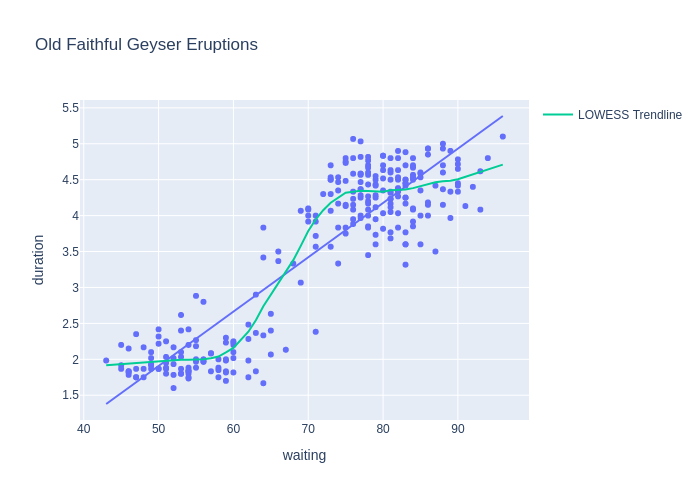

In [7]:
import plotly.express as px
import seaborn as sns
import statsmodels.api as sm

# The "Classic" Old Faithful Geyser dataset: ask a ChatBot for more details if desired
old_faithful = sns.load_dataset('geyser')

# Create a scatter plot with a Simple Linear Regression trendline
fig = px.scatter(old_faithful, x='waiting', y='duration', 
                 title="Old Faithful Geyser Eruptions", 
                 trendline='ols')#'lowess'

# Add a smoothed LOWESS Trendline to the scatter plot
lowess = sm.nonparametric.lowess  # Adjust 'frac' to change "smoothness bandwidth"
smoothed = lowess(old_faithful['duration'], old_faithful['waiting'], frac=0.25)  
smoothed_df = pd.DataFrame(smoothed, columns=['waiting', 'smoothed_duration'])
fig.add_scatter(x=smoothed_df['waiting'], y=smoothed_df['smoothed_duration'], 
                mode='lines', name='LOWESS Trendline')

fig.show(renderer='png') # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

## 8. Null Hypothesis of "no linear association (on average)" and Evidence Characterization, and subsequent beliefs regarding the Old Faithful Geyser dataset

In terms of the relevant parameter of the Simple Linear Regression model, it can be defined using this equation:

Y = β0 + β1 X + ϵ
 
where:
 
- Y is the dependent variable (in this case, duration of the geyser eruptions).
- X is the independent variable (in this case, waiting time).
- β0 is the intercept.
- β1 is the slope of the regression line (the coefficient of waiting).
- ϵ is the error term.

The null hypothesis (H0) can be stated as:
H0: β1 = 0

which means changes in waiting time do not predict changes in duration.

Using code to test the Null Hypothesis:

In [8]:
import seaborn as sns
import statsmodels.formula.api as smf

# The "Classic" Old Faithful Geyser dataset
old_faithful = sns.load_dataset('geyser')

# Specify the linear model
linear_for_specification = 'duration ~ waiting'
model = smf.ols(linear_for_specification, data=old_faithful)

# Fit the model
fitted_model = model.fit()

# Display the summary
summary = fitted_model.summary()
print(summary)


                            OLS Regression Results                            
Dep. Variable:               duration   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     1162.
Date:                Mon, 28 Oct 2024   Prob (F-statistic):          8.13e-100
Time:                        05:52:48   Log-Likelihood:                -194.51
No. Observations:                 272   AIC:                             393.0
Df Residuals:                     270   BIC:                             400.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.8740      0.160    -11.702      0.0

The summary output includes:

- Coefficient for waiting: This will give you the estimate of β1.
- Standard Error: This indicates the variability of the estimate.
- t-statistic: This value helps to assess the significance of the coefficient.
- p-value: This is crucial for hypothesis testing.

Based on the output, subsequent beliefs regarding the Old Faithful Geyser dataset are that:

1. If the p-value associated with waiting is less than the significance level (commonly 0.05):

    We reject the null hypothesis H0: β1 = 0. This suggests there is a statistically significant linear association between waiting time and duration. We would conclude that, on average, as the waiting time increases, the duration of the eruptions also tends to increase.
    
2. If the p-value is greater than the significance level:

    We fail to reject the null hypothesis. This implies that there is not enough evidence to claim a linear association between waiting and duration in the data. We would conclude that changes in waiting time do not significantly predict changes in eruption duration.

## 9. Geyser Eruption within the Context of Short Wait Times

Codes that restrict to only short wait times (62, 64, 66):

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.6401      0.309      5.306      0.000       1.025       2.255
waiting        0.0069      0.006      1.188      0.238      -0.005       0.019


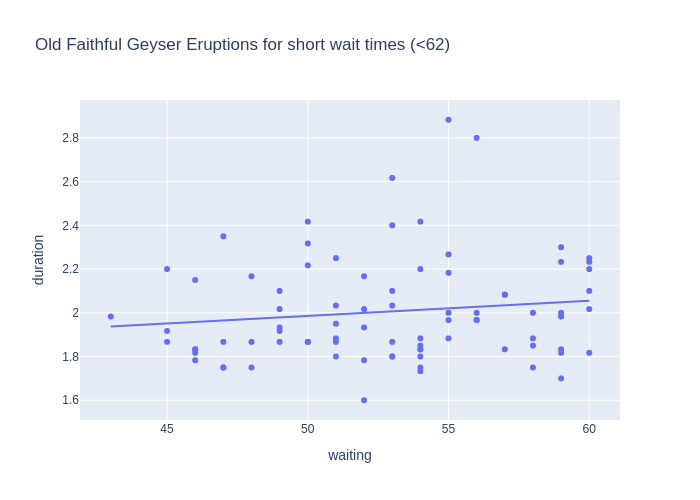

In [9]:
import plotly.express as px
import statsmodels.formula.api as smf


short_wait_limit = 62 # 64 # 66 #
short_wait = old_faithful.waiting < short_wait_limit

print(smf.ols('duration ~ waiting', data=old_faithful[short_wait]).fit().summary().tables[1])

# Create a scatter plot with a linear regression trendline
fig = px.scatter(old_faithful[short_wait], x='waiting', y='duration', 
                 title="Old Faithful Geyser Eruptions for short wait times (<"+str(short_wait_limit)+")", 
                 trendline='ols')

fig.show(renderer='png') # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.4140      0.288      4.915      0.000       0.842       1.986
waiting        0.0114      0.005      2.127      0.036       0.001       0.022


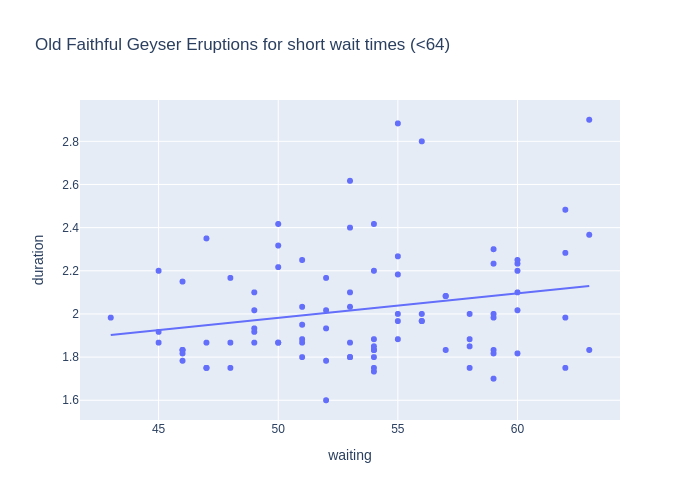

In [10]:
import plotly.express as px
import statsmodels.formula.api as smf


short_wait_limit = 64 # 66 #
short_wait = old_faithful.waiting < short_wait_limit

print(smf.ols('duration ~ waiting', data=old_faithful[short_wait]).fit().summary().tables[1])

# Create a scatter plot with a linear regression trendline
fig = px.scatter(old_faithful[short_wait], x='waiting', y='duration', 
                 title="Old Faithful Geyser Eruptions for short wait times (<"+str(short_wait_limit)+")", 
                 trendline='ols')

fig.show(renderer='png') # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8619      0.327      2.637      0.010       0.213       1.511
waiting        0.0221      0.006      3.704      0.000       0.010       0.034


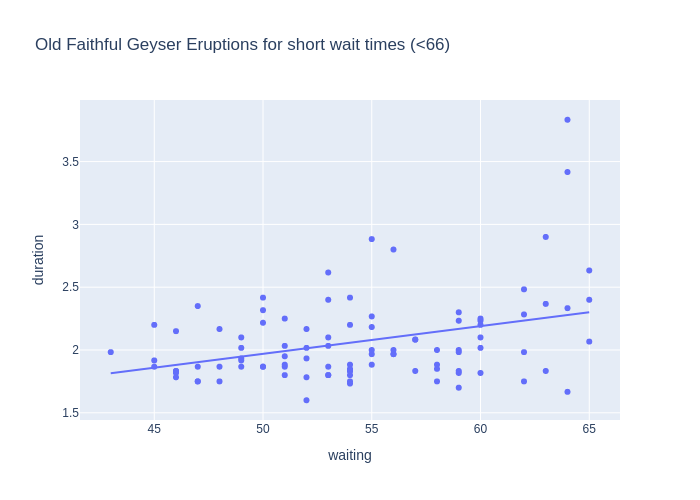

In [11]:
import plotly.express as px
import statsmodels.formula.api as smf


short_wait_limit = 66 #
short_wait = old_faithful.waiting < short_wait_limit

print(smf.ols('duration ~ waiting', data=old_faithful[short_wait]).fit().summary().tables[1])

# Create a scatter plot with a linear regression trendline
fig = px.scatter(old_faithful[short_wait], x='waiting', y='duration', 
                 title="Old Faithful Geyser Eruptions for short wait times (<"+str(short_wait_limit)+")", 
                 trendline='ols')

fig.show(renderer='png') # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

To characterize the evidence against the null hypothesis in the context of short wait times (less than specified values of 62, 64, and 66 minutes), we will evaluate the linear regression results from the analyses for each of these limits. We need to check for the coefficient (β1) and the p-value for waiting, which is the slope.

For 62 minutes:

- the coefficient (β1) for waiting: 0.0069
- P-value: 0.238

Which means:

- Since the p-value is greater than 0.05, it leads to a failure to reject the null hypothesis.
- This suggests that there is no significant evidence of a linear relationship between waiting time and eruption duration for wait times less than 62 minutes.
- The coefficient indicates a negligible increase in duration per additional minute of waiting.

For 64 minutes:

- the coefficient (β1) for waiting: 0.0114
- P-value: 0.036

Which means:

- The p-value is less than 0.05, allowing us to reject the null hypothesis.
- There is significant evidence of a positive linear relationship between waiting time and eruption duration for wait times less than 64 minutes.
- The positive coefficient suggests that longer waiting times are associated with longer eruption durations.

For 66 minutes:

- the coefficient (β1) for waiting: 0.0221
- P-value: 0.000

Which means:

- The p-value is much less than 0.05, leading us to strongly reject the null hypothesis.
- There is strong evidence for a positive linear relationship between waiting time and eruption duration for wait times less than 66 minutes.
- The higher coefficient indicates a more substantial increase in eruption duration with additional waiting time compared to the previous limits.

In conclusion:

- At 62 minutes, there is insufficient evidence to claim a relationship.
- At 64 minutes, there is significant evidence supporting the idea that longer waits lead to longer eruptions.
- At 66 minutes, the evidence is even stronger, with a more substantial increase in eruption duration per additional minute of waiting.

## 10. Writing code considering just the (n=160) long wait times

Specified in code:

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.3520      0.476      7.049      0.000       2.413       4.291
waiting        0.0122      0.006      2.091      0.038       0.001       0.024


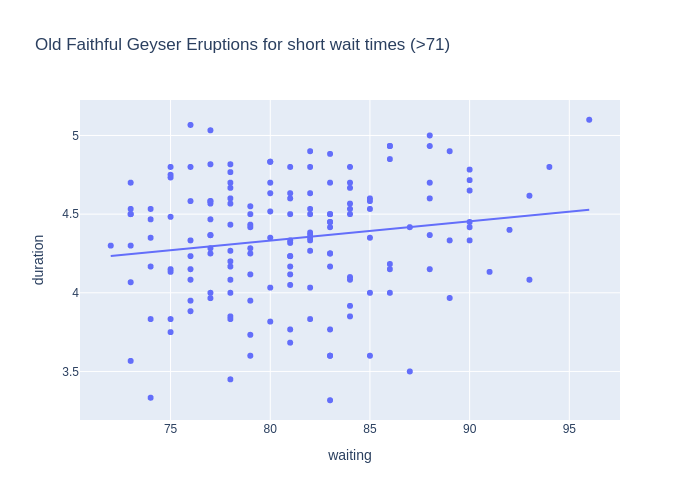

In [12]:
import plotly.express as px

long_wait_limit = 71
long_wait = old_faithful.waiting > long_wait_limit

print(smf.ols('duration ~ waiting', data=old_faithful[long_wait]).fit().summary().tables[1])

# Create a scatter plot with a linear regression trendline
fig = px.scatter(old_faithful[long_wait], x='waiting', y='duration', 
                 title="Old Faithful Geyser Eruptions for short wait times (>"+str(long_wait_limit)+")", 
                 trendline='ols')
fig.show(renderer='png') # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

No. 1

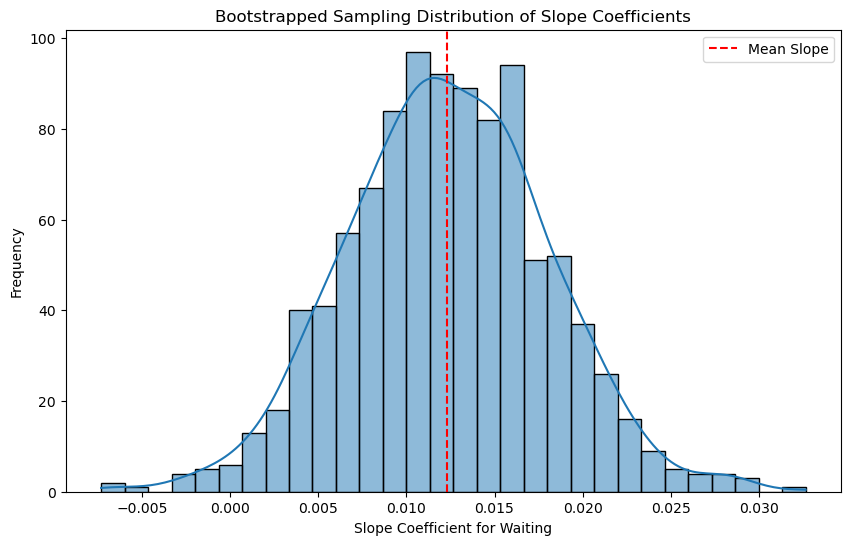

In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

# Assuming old_faithful is already loaded as shown in your previous code
long_wait_limit = 71
long_wait = old_faithful.waiting > long_wait_limit
data_long_wait = old_faithful[long_wait]

# Set number of bootstrap samples
n_bootstrap = 1000
slope_coefficients = []

# Bootstrap Sampling
for _ in range(n_bootstrap):
    # Create a bootstrap sample
    bootstrap_sample = data_long_wait.sample(n=len(data_long_wait), replace=True)
    
    # Fit the model and get the slope coefficient
    model = smf.ols('duration ~ waiting', data=bootstrap_sample).fit()
    slope_coefficients.append(model.params['waiting'])

# Convert to a DataFrame for easier plotting
slope_distribution = pd.DataFrame(slope_coefficients, columns=['slope'])

# Visualization of the bootstrapped sampling distribution
plt.figure(figsize=(10, 6))
sns.histplot(slope_distribution['slope'], bins=30, kde=True)
plt.title('Bootstrapped Sampling Distribution of Slope Coefficients')
plt.xlabel('Slope Coefficient for Waiting')
plt.ylabel('Frequency')
plt.axvline(slope_distribution['slope'].mean(), color='red', linestyle='--', label='Mean Slope')
plt.legend()
plt.show()


No. 2

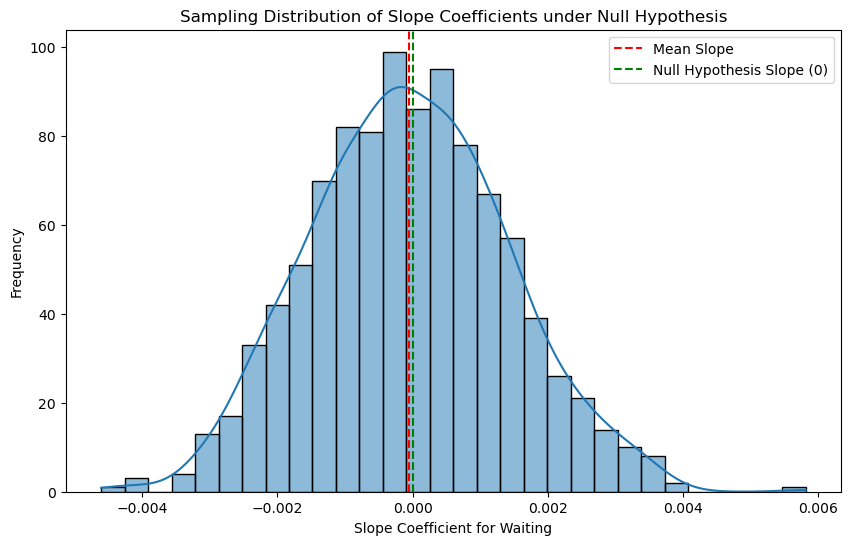

In [14]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt

# Parameters for the simulation
beta_0 = 1.65
beta_1 = 0  # No linear association
sigma = 0.37
n_samples = 1000  # Number of bootstrap samples
n = 160  # Size of each sample

# Generate waiting times (X values)
np.random.seed(42)  # For reproducibility
waiting_times = np.random.uniform(low=30, high=100, size=n)  # Simulating waiting times

# List to hold slope coefficients from the simulations
slope_coefficients = []

# Simulate response values and fit models
for _ in range(n_samples):
    # Generate Y values according to the model
    epsilon = np.random.normal(0, sigma, size=n)  # Random noise
    Y = beta_0 + beta_1 * waiting_times + epsilon  # Simulated response values
    
    # Create a DataFrame for fitting the model
    df_simulated = pd.DataFrame({'waiting': waiting_times, 'duration': Y})
    
    # Fit the model and collect the slope coefficient
    model = smf.ols('duration ~ waiting', data=df_simulated).fit()
    slope_coefficients.append(model.params['waiting'])

# Convert to a DataFrame for easier plotting
slope_distribution = pd.DataFrame(slope_coefficients, columns=['slope'])

# Visualization of the sampling distribution of slope coefficients
plt.figure(figsize=(10, 6))
sns.histplot(slope_distribution['slope'], bins=30, kde=True)
plt.title('Sampling Distribution of Slope Coefficients under Null Hypothesis')
plt.xlabel('Slope Coefficient for Waiting')
plt.ylabel('Frequency')
plt.axvline(slope_distribution['slope'].mean(), color='red', linestyle='--', label='Mean Slope')
plt.axvline(0, color='green', linestyle='--', label='Null Hypothesis Slope (0)')
plt.legend()
plt.show()


In [15]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt

# Parameters for the simulation
beta_0 = 1.65
beta_1 = 0  # No linear association
sigma = 0.37
n_samples = 1000  # Number of bootstrap samples
n = 160  # Size of each sample

# Generate waiting times (X values)
np.random.seed(42)  # For reproducibility
waiting_times = np.random.uniform(low=30, high=100, size=n)  # Simulating waiting times

# List to hold slope coefficients from the simulations
slope_coefficients = []

# Simulate response values and fit models
for _ in range(n_samples):
    # Generate Y values according to the model
    epsilon = np.random.normal(0, sigma, size=n)  # Random noise
    Y = beta_0 + beta_1 * waiting_times + epsilon  # Simulated response values
    
    # Create a DataFrame for fitting the model
    df_simulated = pd.DataFrame({'waiting': waiting_times, 'duration': Y})
    
    # Fit the model and collect the slope coefficient
    model = smf.ols('duration ~ waiting', data=df_simulated).fit()
    slope_coefficients.append(model.params['waiting'])

# Calculate the 95% bootstrapped confidence interval
ci_lower = np.percentile(slope_coefficients, 2.5)
ci_upper = np.percentile(slope_coefficients, 97.5)

# Check if 0 is contained within the confidence interval
is_zero_within_ci = ci_lower <= 0 <= ci_upper

# Fit the original model to the long wait times
long_wait_limit = 71
long_wait = old_faithful.waiting > long_wait_limit
original_model = smf.ols('duration ~ waiting', data=old_faithful[long_wait]).fit()

# Extract the p-value from the original model
original_p_value = original_model.pvalues['waiting']

# Calculate the simulated p-value (one-tailed)
simulated_p_value = np.mean(np.array(slope_coefficients) > 0)

# Report the results
print(f"95% Bootstrapped Confidence Interval: [{ci_lower:.4f}, {ci_upper:.4f}]")
print(f"Is 0 contained within the confidence interval? {'Yes' if is_zero_within_ci else 'No'}")
print(f"Original p-value from long wait model: {original_p_value:.4f}")
print(f"Simulated p-value from bootstrap samples: {simulated_p_value:.4f}")


95% Bootstrapped Confidence Interval: [-0.0027, 0.0029]
Is 0 contained within the confidence interval? Yes
Original p-value from long wait model: 0.0381
Simulated p-value from bootstrap samples: 0.4750


## 11. "Big Picture" Differences and Evidence Assessment

**Key differences:**

1. smf.ols('duration ~ waiting', data=old_faithful)

This model uses the continuous variable waiting to predict the eruption duration across the entire dataset, which includes all observations (both short and long wait times).

Interpretation: The model evaluates the relationship between waiting time and eruption duration across the full range of wait times. The slope coefficient represents the average change in eruption duration for each additional minute of waiting.

Complexity: This model captures the overall trend but may be influenced by outliers or non-linear relationships that could arise at extreme wait times. The linearity assumption may not hold for all ranges of the data, potentially masking nuanced relationships.

Contextual Insights: Since it includes all wait times, the model might dilute the effects of shorter wait times, especially if long wait times disproportionately affect eruption durations.

2. smf.ols('duration ~ waiting', data=old_faithful[short_wait])

This model restricts the analysis to observations with short wait times (e.g., less than 68 minutes).

Interpretation: The model focuses specifically on how waiting times within the "short" category relate to eruption durations. The slope coefficient reflects the average change in duration for short wait times only.

Simplified Analysis: By filtering the dataset, the model can provide more reliable estimates without the influence of long wait times, which may exhibit a different trend in eruption durations.

Practical Insights: This approach can be beneficial when the researcher is interested in understanding the dynamics of shorter waiting periods without the complicating factor of longer wait times, potentially leading to different conclusions regarding eruption behavior.

3. smf.ols('duration ~ waiting', data=old_faithful[long_wait])

This model focuses solely on observations with long wait times (e.g., 68 minutes or more).

Interpretation: This model investigates how waiting times in the "long" category influence eruption durations. The coefficient for waiting indicates how much duration changes with each additional minute of waiting for this specific group.

Understanding Extremes: By analyzing only long wait times, the model can identify and clarify trends that may only emerge in this context, potentially showing a different relationship than that observed in shorter waits.

Specificity: This specification is particularly useful for scenarios where long wait times have distinct behaviors that merit separate analysis, allowing for a more focused investigation of the relationship within this subgroup.

Conclusion:

The first model encompasses the entire dataset, while the second and third models focus on specific subgroups (short and long wait times, respectively). Each model interprets the slope in the context of the specified dataset. The first model provides an overall effect, while the latter two provide insights specific to their respective categories. The first model may miss non-linear trends present in the data, especially if the relationship varies significantly between short and long wait times. The latter models help to mitigate this risk by focusing on more homogenous groups. Depending on research questions, one may prefer a specific model. For instance, if the interest lies in understanding short waits specifically, the second model is more appropriate. Conversely, if examining the behavior of long waits is the focus, the third model is more relevant.

**Evidence report against a null hypothesis of "no difference between groups "on average") for the new indicator variable based model:**

This code uses a new model specification with an indicator variable, kind, which represents the wait time as either "short" or "long." The model is specified as follows:

duration = β0 + βcontrast C(kind, Treatment(reference ="short")) + ε

- β0 represents the average eruption duration for short wait times.
- βcontrast represents the difference in average eruption duration between long and short wait times. This coefficient tests for a statistically significant difference between the two groups.

The null hypothesis (H0) is that there is no difference in eruption duration between short and long wait times (βcontrast = 0).

The alternative hypothesis (H1) is that there is a difference in eruption duration between short and long wait times (βcontrast ≠ 0).

Evidence against the null hypothesis:

After running the code:

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,2.0943,0.041,50.752,0.000,2.013,2.176
"C(kind, Treatment(reference=""short""))[T.long]",2.2036,0.052,42.464,0.000,2.101,2.306


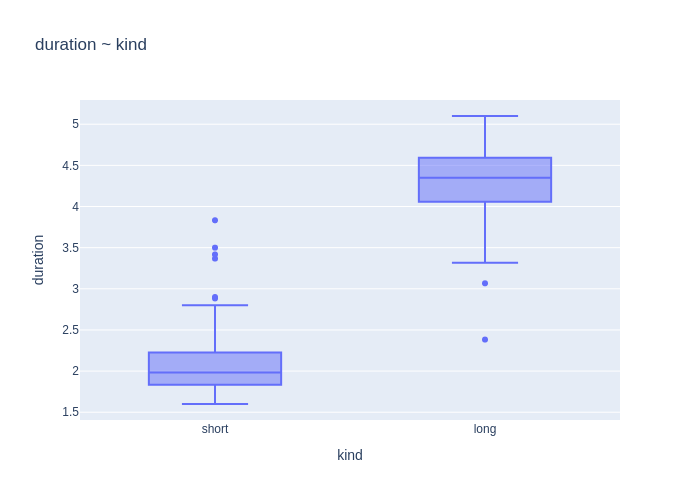

In [16]:
from IPython.display import display

display(smf.ols('duration ~ C(kind, Treatment(reference="short"))', data=old_faithful).fit().summary().tables[1])

fig = px.box(old_faithful, x='kind', y='duration', 
             title='duration ~ kind',
             category_orders={'kind': ['short', 'long']})
fig.show(renderer='png') # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

The coefficient for the intercept (representing short wait times) is 2.0943. This value indicates the average eruption duration for short wait times.

The confidence interval for this intercept is [2.013,2.176], showing a narrow range around the estimated mean duration for short wait times.

The coefficient for long waits is 2.2036. This represents the difference in average eruption duration between long and short wait times.

A positive value of 2.2036 suggests that, on average, eruptions following long waits are 2.2036 minutes longer than those following short waits.

The 95% confidence interval for this coefficient, [2.101,2.306], does not include 0, which provides strong evidence against the null hypothesis of "no difference" between the two groups.

The extremely low p-value (<0.001) also strongly supports rejecting the null hypothesis, indicating a statistically significant difference in eruption duration between short and long wait times.

Given the significant coefficient, p-value, and confidence interval, we conclude that there is robust evidence that eruption durations differ on average between short and long wait times. The model suggests that eruptions following long wait times are, on average, considerably longer than those following short wait times.

## 12. Histogram Identification

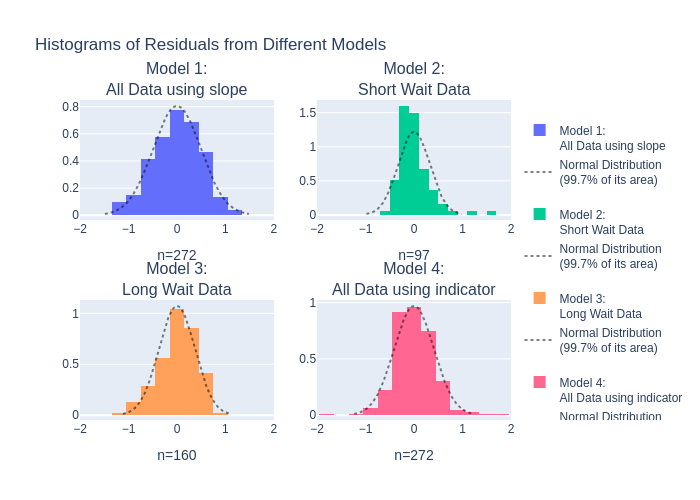

In [22]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from scipy import stats
import numpy as np

model_residuals = {
    '<br>Model 1:<br>All Data using slope': smf.ols('duration ~ waiting', data=old_faithful).fit().resid,
    '<br>Model 2:<br>Short Wait Data': smf.ols('duration ~ waiting', data=old_faithful[short_wait]).fit().resid,
    '<br>Model 3:<br>Long Wait Data': smf.ols('duration ~ waiting', data=old_faithful[long_wait]).fit().resid,
    '<br>Model 4:<br>All Data using indicator': smf.ols('duration ~ C(kind, Treatment(reference="short"))', data=old_faithful).fit().resid
}

fig = make_subplots(rows=2, cols=2, subplot_titles=list(model_residuals.keys()))
for i, (title, resid) in enumerate(model_residuals.items()):

    if i == 1:  # Apply different bins only to the second histogram (index 1)
        bin_size = dict(start=-1.9, end=1.9, size=0.2)
    else:
        bin_size = dict(start=-1.95, end=1.95, size=0.3)

    fig.add_trace(go.Histogram(x=resid, name=title, xbins=bin_size, histnorm='probability density'), 
                  row=int(i/2)+1, col=(i%2)+1)
    fig.update_xaxes(title_text="n="+str(len(resid)), row=int(i/2)+1, col=(i%2)+1)    
    
    normal_range = np.arange(-3*resid.std(),3*resid.std(),0.01)
    fig.add_trace(go.Scatter(x=normal_range, mode='lines', opacity=0.5,
                             y=stats.norm(loc=0, scale=resid.std()).pdf(normal_range),
                             line=dict(color='black', dash='dot', width=2),
                             name='Normal Distribution<br>(99.7% of its area)'), 
                  row=int(i/2)+1, col=(i%2)+1)
    
fig.update_layout(title_text='Histograms of Residuals from Different Models')
fig.update_xaxes(range=[-2,2])
fig.show(renderer='png') # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

Out of all the 4 histograms, the one that suggests the plausibility of the assumption that the distribution of error terms is normal for each of the models is Model 4. This is because the use of an indicator variable to capture the difference between "short" and "long" wait times has likely improved fit, reducing skew and accommodating the natural variability in eruption duration between groups. It better captures the distinct behavior of the two wait time groups, resulting in residuals that align more closely with normality.

**Model 1**

Model 1, which uses all data with a single slope, does have residuals that are reasonably symmetric and somewhat close to the normal curve. However, it still doesn’t match the normal distribution as well as Model 4.

Model 1 uses a single slope to fit all observations, regardless of the natural division between "short" and "long" wait times. This can lead to a less precise fit, as it doesn’t account for the fact that duration might behave differently depending on whether the wait time is short or long. This lack of specificity can introduce bias and increase variance in the residuals, making them less normally distributed.

**Model 2**

In Model 2, the residuals in show a strong asymmetry, with a higher concentration near zero and a heavier tail on one side. This suggests that the distribution of residuals is skewed, which violates the normality assumption needed for many linear regression inference procedures.

By only using the "short wait" data (wait times less than a certain threshold), Model 2 is fit to a restricted subset of the dataset. This subset may not fully capture the range and variability in eruption durations, which can lead to a biased estimation of the relationship. The lack of data from the "long wait" group might limit the model's ability to capture the full pattern in eruption duration, resulting in non-normal residuals.

**Model 3**

Similar to Model 2, by isolating only the long wait times, Model 3 cannot account for differences in the behavior of short wait times. This structural incompleteness might lead to systematic biases that affect the distribution of residuals, making them less likely to meet the normality assumption.

## 13. Permutation Test or Bootstrap Confidence Interval for the Difference in Means

A. Permutation Test

In [27]:
import pandas as pd
import numpy as np

# Calculate the observed mean difference between "long" and "short" groups
observed_diff = old_faithful.groupby('kind')['duration'].mean().iloc[::-1].diff().values[1]

# Set up the permutation test parameters
n_permutations = 10000  # Number of permutation samples
permuted_diffs = []  # Store the differences from each permutation

for _ in range(n_permutations):
    # Shuffle the 'kind' labels and calculate the mean difference
    shuffled_data = old_faithful.assign(kind_shuffled=old_faithful['kind'].sample(n=len(old_faithful), replace=False).values)
    permuted_diff = shuffled_data.groupby('kind_shuffled')['duration'].mean().iloc[::-1].diff().values[1]
    permuted_diffs.append(permuted_diff)

# Convert to a numpy array for easier manipulation
permuted_diffs = np.array(permuted_diffs)

# Calculate the p-value by comparing the observed difference with the null distribution
p_value = (np.abs(permuted_diffs) >= np.abs(observed_diff)).mean()

# Print results
print("Observed Difference in Means:", observed_diff)
print("Permutation Test p-value:", p_value)


Observed Difference in Means: 2.20360023255814
Permutation Test p-value: 0.0


B. Bootstrap Confidence Interval

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

# Load Old Faithful dataset
old_faithful = sns.load_dataset('geyser')

# Set parameters
num_bootstraps = 10000  # Number of bootstrap samples
bootstrapped_mean_differences = []

# Run bootstrap resampling
for _ in range(num_bootstraps):
    # Resample within each group
    bootstrapped_sample = old_faithful.groupby('kind').apply(lambda x: x.sample(n=len(x), replace=True)).reset_index(drop=True)
    
    # Calculate the mean difference between "long" and "short" wait groups for this bootstrap sample
    mean_diff = bootstrapped_sample.groupby('kind')['duration'].mean().iloc[::-1].diff().values[1]
    bootstrapped_mean_differences.append(mean_diff)

# Calculate 95% confidence interval for the difference in means
ci_lower, ci_upper = np.quantile(bootstrapped_mean_differences, [0.025, 0.975])
print(f"95% Bootstrap Confidence Interval for the Difference in Means: [{ci_lower:.3f}, {ci_upper:.3f}]")


95% Bootstrap Confidence Interval for the Difference in Means: [2.100, 2.300]


a.

1. Permutation Test

    Tests whether the observed mean difference is likely under the null hypothesis. It is a non-parametric approach used to test the null hypothesis, which states that there is no difference in means between the two groups.It answers "Is there a significant difference?" by calculating a p-value.
    
    Process:
    
    No 1. Under the null hypothesis, we assume that the assignment of "short" or "long" labels to the durations is arbitrary, meaning there's no inherent difference between these groups. To simulate this, we shuffle the "short" and "long" labels across the entire dataset while keeping the durations fixed.
    
    No 2. After each shuffle, we calculate the mean difference in durations between the "long" and "short" groups based on the shuffled labels. This gives us one value for the "mean difference under the null hypothesis."
    
    No 3. We repeat this shuffling process many times (e.g., 10,000 iterations) to build a distribution of mean differences under the null hypothesis.
    
    No 4. Finally, we compare the observed mean difference (from the original dataset) to this distribution of shuffled mean differences. The p-value represents the proportion of shuffled samples that have a mean difference as extreme or more extreme than the observed difference. A low p-value (e.g., below 0.05) would indicate that the observed difference is unlikely to occur under the null hypothesis, suggesting a statistically significant difference between the groups.
    
2. Two-Sample Bootstrapping

    Estimates the range of plausible values for the true difference in means. It answers "What is the likely range of the difference?" by constructing a confidence interval. Unlike the permutation test, which assesses statistical significance, bootstrapping here helps us create a confidence interval for the difference in means.
    
    Process:
    
    No 1. To create a bootstrap sample, we randomly sample durations with replacement within each group ("short" and "long") to create new datasets of the same size as the original groups.
    
    No 2. For each resampled dataset, we compute the mean of the "short" and "long" groups and calculate the difference between these means. This provides one value for the "bootstrapped mean difference."
    
    No 3. We repeat this resampling and mean difference calculation many times (e.g., 10,000 iterations) to build a distribution of bootstrapped mean differences.
    
    No 4. Finally, we take the 2.5th and 97.5th percentiles of the bootstrapped mean difference distribution to form a 95% confidence interval. This interval estimates the range of plausible values for the true mean difference between the groups. If the interval does not include zero, we have evidence of a statistically significant difference between the groups.

b.

Comparison Summary:

A. Goal

- Indicator Variable Model: Test for mean difference and estimate effect size
- Permutation Test: Test for statistical significance only
- Two-Sample Bootstrapping: Estimate range of effect size (confidence interval)

B. Assumptions

- Indicator Variable Model: Linear model, normal errors, homoscedasticity
- Permutation Test: No parametric assumptions
- Two-Sample Bootstrapping: No parametric assumptions

C. Hypothesis Test

- Indicator Variable Model: t-test on t-test on β contrast
- Permutation Test: p-value from permutations
- Two-Sample Bootstrapping: Not directly, but CI can be interpreted for significance

D. Effect Size Estimate

- Indicator Variable Model: Point estimate of β contrast
- Permutation Test: Not directly estimated
- Two-Sample Bootstrapping: Mean difference with CI

E. Robustness to Non-Normality

- Indicator Variable Model: Less robust
- Permutation Test: More robust
- Two-Sample Bootstrapping: More robust

F. Output

- Indicator Variable Model: Estimate and p-value for β contrast
- Permutation Test: p-value for mean difference
- Two-Sample Bootstrapping: 95% confidence interval for mean difference

Use the indicator variable model if assumptions hold and you want a parametric test with effect size.

Use the permutation test for a robust, assumption-free p-value.

Use bootstrapping for an assumption-free estimate of effect size and precision.

For the similarities, all three approaches aim to compare the mean eruption durations between the two groups (short vs. long wait times). Each method allows us to examine whether the observed difference in durations is statistically significant or meaningful. They ultimately aim to determine if there’s enough evidence to claim a distinction between the "short" and "long" categories. Each method involves the calculation of mean differences between groups. In the indicator model, the coefficient for the indicator variable estimates this difference; in the permutation test, the mean difference between groups is calculated for each shuffled sample; and in bootstrapping, the mean difference is recalculated across resampled datasets.

For the differences, the methodologies of each differ when:

- Indicator Variable Model: This is a regression-based approach. It uses a linear model with an indicator (dummy) variable to represent the two categories (short and long). The model then estimates a single coefficient for the difference between the groups.

- Permutation Test: This is a non-parametric test that relies on randomly shuffling the group labels (short or long) to generate a distribution of mean differences under the null hypothesis of no difference. It provides a p-value but doesn’t estimate an effect size directly.

- Two-Sample Bootstrapping: This approach resamples the data within each group separately and computes the mean difference for each resample, creating a distribution of mean differences. It yields a confidence interval for the difference in means, which reflects the precision of the estimated effect.

While the assumptions are:

- Indicator Variable Model: Assumes that errors are normally distributed and that there’s a linear relationship between the response variable and the indicator variable. It also assumes homoscedasticity (equal variances across groups).

- Permutation Test: Makes minimal assumptions, only assuming that the group labels are exchangeable under the null hypothesis.

- Two-Sample Bootstrapping: Also has minimal assumptions and does not require normally distributed errors or equal variances, making it more flexible for non-normal data.

And the Output and Interpretation are:

- Indicator Variable Model: Provides an effect size estimate (coefficient for the indicator variable) and a p-value. The coefficient reflects the mean difference between groups, and the p-value tests if this difference is statistically significant.

- Permutation Test: Yields a p-value by comparing the observed mean difference to the distribution generated through label shuffling, which tests whether the observed difference could have arisen by chance.

- Two-Sample Bootstrapping: Produces a confidence interval for the mean difference, indicating the range of plausible values for the difference in group means.

And when we use them:

- Indicator Variable Model: Preferred if data meet the assumptions of normality and equal variances, providing both an estimate and significance test for the mean difference.

- Permutation Test: Useful when assumptions of normality or equal variances do not hold, and we want a straightforward test for significance.

- Two-Sample Bootstrapping: Ideal for providing an effect size with a confidence interval when data don’t meet the assumptions required by parametric methods.

## Summary of Chatbot Session for No. 8-13:

Certainly! Here's a summary of our conversation:

### 1. **Old Faithful Geyser Data Analysis**
   - We explored statistical approaches to analyze the relationship between eruption durations and wait times in the Old Faithful Geyser dataset. We focused on various methods to assess differences between “short” and “long” wait times, defined by different threshold values.

### 2. **Linear Regression Models**
   - We used **Simple Linear Regression models** to estimate the relationship between duration and wait time in various subsets of the data:
     - **All data**: using wait time as the predictor.
     - **Short wait data** and **Long wait data**: analyzing shorter and longer wait times separately.
   - Additionally, we created an **indicator variable model** using a binary variable (short vs. long wait times) to assess the mean difference in duration between the two groups.

### 3. **Null Hypothesis Testing**
   - For the regression models, we evaluated evidence against the null hypothesis (H0: no association between wait time and eruption duration) based on the regression coefficient and p-values. We discussed why the focus is on the slope term instead of the intercept when assessing the linear relationship.

### 4. **Permutation Test for Group Differences**
   - We ran a **permutation test** to compare eruption durations between short and long wait groups, simulating the null hypothesis by shuffling group labels and calculating the mean difference each time. This approach provided a p-value for testing H0: no difference between groups.

### 5. **Two-Sample Bootstrapping**
   - We conducted **two-sample bootstrapping** to create a 95% confidence interval for the difference in mean durations between short and long wait groups. This approach resamples each group independently to assess the precision of the mean difference estimate.

### 6. **Comparing Methods**
   - We summarized and contrasted the **indicator variable model**, **permutation test**, and **two-sample bootstrapping**:
     - **Indicator Variable Model**: Parametric, provides a p-value and estimated effect size under regression assumptions.
     - **Permutation Test**: Non-parametric, gives a p-value by shuffling labels, requiring few assumptions.
     - **Two-Sample Bootstrapping**: Non-parametric, provides a confidence interval for the difference in means, useful for non-normal data.
   - The indicator model estimates the mean difference directly, while the permutation test tests significance, and bootstrapping provides a confidence interval for the difference.

### 7. **Interpretation of Results**
   - From each approach, we derived insights on whether the data provides evidence of a difference in durations between short and long wait times, helping to understand the nature and significance of this difference in a statistically robust manner.

This summary covers the technical approaches, hypothesis testing, and interpretations involved in the geyser dataset analysis!

Chatbot log link: *could not share as conversations with user uploaded images is not supported*.

## 14. Yes.

End of HW 6.